"\n\nsubr=radius[np.isin(ids,subid)]\nprint(len(subr))\nx=com_star[:,0][np.isin(ids,submain)]\ny=com_star[:,1][np.isin(ids,submain)]\nz=com_star[:,2][np.isin(ids,submain)]\nr=radius[np.isin(ids,submain)]\nsubO=O[BCGid!=mainid]*subr*1000\nxs=com_star[:,0][np.isin(ids,subid)]\nys=com_star[:,1][np.isin(ids,subid)]\nzs=com_star[:,2][np.isin(ids,subid)]\nrs=radius[np.isin(ids,subid)]\n\n#mask2=True#(subO*subr*1000<200)\n#mass[mask]/mass[mask3]\n\n\nsc=ax.scatter(x[subO<200],y[subO<200],s=r[subO<200]**2*np.pi,c=z[subO<200],alpha=0.5)\nax.scatter(xs[subO<200],ys[subO<200],s=rs[subO<200]**2*np.pi,c='k',alpha=0.5)\nprint(len(BCGid[BCGid!=mainid]))\nplt.colorbar(sc)\n#ax.set_yscale('log')\n"

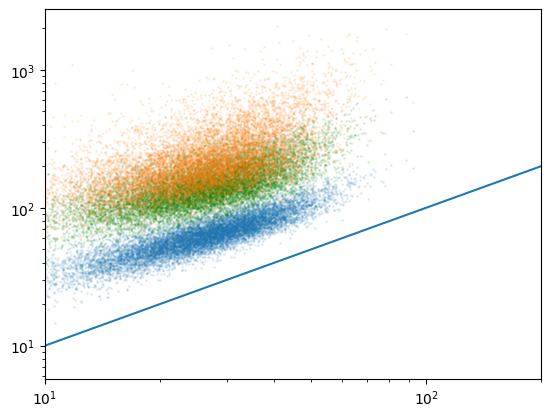

In [107]:
import h5py
import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
import functions as fn
from matplotlib import colors
import matplotlib.pyplot as plt

path="/Users/24756376/data/Flamingo/L1000N0900/"


f=h5py.File(path+'compare_brightnest_central.hdf5','r')
s=f["PartType0"]
Brightid=np.array(s["Brightid"])
Bright2ndid=np.array(s["Bright2ndid"])
cebtralid=np.array(s["centralid"])
f.close()

f=h5py.File(path+'halos.hdf5','r')
halo_id=np.array(f["halos"]["id"])
radius=np.array(f["halos"]["r200"])
r200=np.array(f["halos"]["r200"])
host_id=np.array(f["halos"]["hostid"])
mass=np.array(f["halos"]["mass"])
mbp=np.array(f["halos"]["center"])
star_mass=np.array(f["halos"]["mass_star_100kpc"])
com_star=np.array(f["halos"]["com_star_100kpc"])
star_lumz=np.array(f["halos"]["lumz_100kpc"])
star_lumz50=np.array(f["halos"]["lumz_50kpc"])
star_lumz300=np.array(f["halos"]["lumz_300kpc"])
star_lumz3000=np.array(f["halos"]["lumz_3000kpc"])
ms=np.array(f["halos"]["mass_star_100kpc"])
ms50=np.array(f["halos"]["mass_star_50kpc"])
ms300=np.array(f["halos"]["mass_star_300kpc"])
ms3000=np.array(f["halos"]["mass_star_3000kpc"])
f.close()


#ignore all the halos without models of star lum and com
rs=np.sqrt(com_star[:,0]**2+com_star[:,1]**2+com_star[:,2]**2)
mask=(star_lumz>0)*(rs>0)
halo_id=halo_id[mask]
host_id=host_id[mask]
mbp=mbp[mask]
r200=r200[mask]
star_mass=star_mass[mask]
com_star=com_star[mask]
star_lumz=star_lumz[mask]
star_lumz50=star_lumz50[mask]
star_lumz300=star_lumz300[mask]
star_lumz3000=star_lumz3000[mask]
mass=mass[mask]
radius=radius[mask]
ms=ms[mask]
ms50=ms50[mask]
ms300=ms300[mask]
ms3000=ms3000[mask]
ids=np.arange(0,len(halo_id),1)
mainmass=mass[(host_id==-1)*(mass>10000)][Brightid!=-1]
mbpc=mbp[(host_id==-1)*(mass>10000)][Brightid!=-1]
r200c=r200[(host_id==-1)*(mass>10000)][Brightid!=-1]
cebtralid=cebtralid[Brightid!=-1]
Bright2ndid=Bright2ndid[Brightid!=-1]
Brightids=Brightid[Brightid!=-1]

fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(ms50[host_id==-1],ms[host_id==-1],s=1,alpha=0.1)
#ax.scatter(mass[host_id==-1],star_lumz[host_id==-1],s=1,alp#ha=0.1)
ax.scatter(ms50[host_id==-1],ms300[host_id==-1],color='g',s=1,alpha=0.1)
ax.scatter(ms50[host_id==-1],ms3000[host_id==-1],s=1,alpha=0.1)
ax.plot(np.linspace(10**1,2*10**2,100),np.linspace(10**1,2*10**2,100))
ax.set_xlim(10**1,2*10**2)
ax.set_xscale('log')
ax.set_yscale('log')
'''

subr=radius[np.isin(ids,subid)]
print(len(subr))
x=com_star[:,0][np.isin(ids,submain)]
y=com_star[:,1][np.isin(ids,submain)]
z=com_star[:,2][np.isin(ids,submain)]
r=radius[np.isin(ids,submain)]
subO=O[BCGid!=mainid]*subr*1000
xs=com_star[:,0][np.isin(ids,subid)]
ys=com_star[:,1][np.isin(ids,subid)]
zs=com_star[:,2][np.isin(ids,subid)]
rs=radius[np.isin(ids,subid)]

#mask2=True#(subO*subr*1000<200)
#mass[mask]/mass[mask3]


sc=ax.scatter(x[subO<200],y[subO<200],s=r[subO<200]**2*np.pi,c=z[subO<200],alpha=0.5)
ax.scatter(xs[subO<200],ys[subO<200],s=rs[subO<200]**2*np.pi,c='k',alpha=0.5)
print(len(BCGid[BCGid!=mainid]))
plt.colorbar(sc)
#ax.set_yscale('log')
'''

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,
          2.,   0.,   0.,   1.,   6.,   7.,   6.,  10.,  16.,  26.,  18.,
         30.,  45.,  62.,  75.,  60.,  54.,  31.,  52.,  80.,  95., 126.,
         68.,  21.,   7.,   1.,   0.]),
 array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
        2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
        6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
        1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
        4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
        1.09854114e-02, 1.38949549e-02, 1.75751062e-02, 2.22299648e-02,
        2.81176870e-02, 3.55648031e-02, 4.49843267e-02, 5.68986603e-02,
        7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
        1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
        4.714866

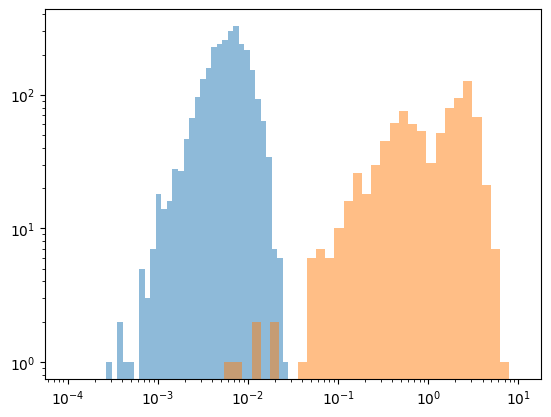

In [110]:




lb=np.zeros(len(Bright2ndid))
l2b=np.zeros(len(Bright2ndid))
comb=np.zeros((len(Bright2ndid),3))

for i in range(0,len(Bright2ndid)):
  lb[i]=star_mass[int(Brightids[i])]/star_lumz[int(Brightids[i])]
  l2b[i]=star_mass[int(Bright2ndid[i])]/star_lumz[int(Bright2ndid[i])]
  comb[i]=com_star[int(Brightids[i])]
d=comb-mbpc

ratiomass=np.sqrt(d[:,0]**2+d[:,1]**2+d[:,2]**2)/r200c

fig=plt.figure()
ax=plt.subplot(1,1,1)
#ax.scatter(mainmass[Brightids==cebtralid],ratiomass[Brightids==cebtralid],s=1,alpha=0.5)
#ax.scatter(mainmass[Brightids!=cebtralid],ratiomass[Brightids!=cebtralid],s=1,alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.hist(ratiomass[Brightids==cebtralid],alpha=0.5,bins=10**(np.linspace(-4,-1,50)))
ax.hist(ratiomass[Brightids!=cebtralid],alpha=0.5,bins=10**(np.linspace(-4,1,50)))

538
8274


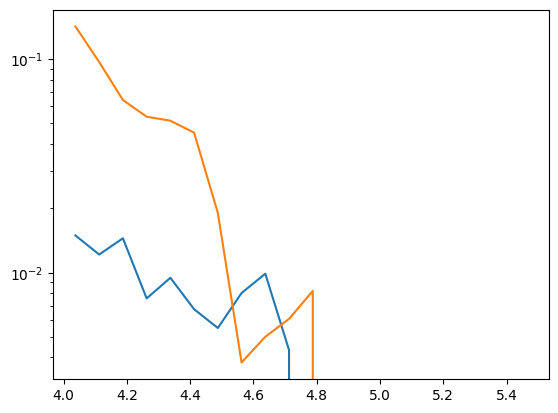

In [112]:
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800/massBCG_exr3000kpc.hdf5','r')
s=f["PartType0"]
fBCG=np.array(s['fBCG'])
massbin=np.array(s['massbin'])
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N0900/massBCG_exr3000kpc.hdf5','r')
s=f["PartType0"]
fBCG2=np.array(s['fBCG'])
massbin2=np.array(s['massbin'])
mainid2=np.array(s['mainid'])
BCGid2=np.array(s['BCGid'])
f.close()
print(len(mainid[BCGid==-1]))
print(len(mainid2[BCGid2==-1]))
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(massbin,fBCG,label="L1000N1800")
ax.plot(massbin2,fBCG2,label="L1000N0900")
#ax.set_xbound(4,5.2)
ax.set_yscale('log')

In [2]:
dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP/halo_properties_0127.hdf5"

data_h=sw.load(dir)
center=np.array(data_h.input_halos.halo_centre)
radius=np.array(data_h.bound_subhalo.enclose_radius)
data_h=[]

In [1]:
id=12975221
  
dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP"
r=radius[id]*unyt.Mpc
print(r)
sgi=sg.SWIFTGalaxy(dir+"/colibre_with_SOAP_membership_0127.hdf5",
                   sg.SOAP(dir+"/halo_properties_0127.hdf5",soap_index=id))

  


#  print(len(sgi.stars.spherical_coordinates.r))
xs=np.array(sgi.stars.cartesian_coordinates.x)
ys=np.array(sgi.stars.cartesian_coordinates.y)
zs=np.array(sgi.stars.cartesian_coordinates.z)
xdm=np.array(sgi.dark_matter.cartesian_coordinates.x)
ydm=np.array(sgi.dark_matter.cartesian_coordinates.y)
zdm=np.array(sgi.dark_matter.cartesian_coordinates.z)
#  PartType2=np.array([xdm,ydm,zdm]).T


NameError: name 'radius' is not defined

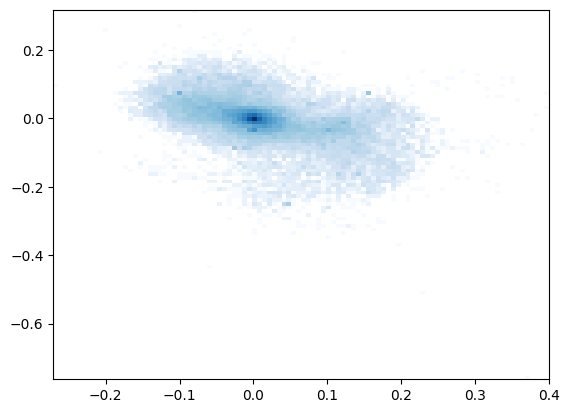

In [40]:
lum=sgi.stars.luminosities.GAMA_z
r=radius[id]
fig = plt.figure()
ax=plt.subplot(1,1,1) 
h=ax.hist2d(xs/r,ys/r,cmap='Blues',bins=100,norm=colors.LogNorm())

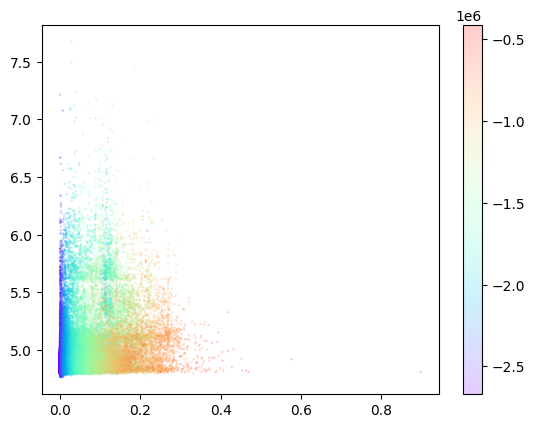

In [41]:
lum=sgi.stars.luminosities.GAMA_z
p=sgi.stars.potentials
rs=sgi.stars.spherical_coordinates.r/r
fig = plt.figure()
ax=plt.subplot(1,1,1)

sc=ax.scatter(rs,np.log10(lum),s=0.5,alpha=0.2,c=p,cmap='rainbow')
plt.colorbar(sc)